In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
for dirname,_,filenames in os.walk(r"G:\br-t"):
    for filename in filenames:
        print(os.path.join(dirname,filename))

G:\br-t\Testing\glioma_tumor\image(1).jpg
G:\br-t\Testing\glioma_tumor\image(10).jpg
G:\br-t\Testing\glioma_tumor\image(100).jpg
G:\br-t\Testing\glioma_tumor\image(11).jpg
G:\br-t\Testing\glioma_tumor\image(12).jpg
G:\br-t\Testing\glioma_tumor\image(13).jpg
G:\br-t\Testing\glioma_tumor\image(14).jpg
G:\br-t\Testing\glioma_tumor\image(15).jpg
G:\br-t\Testing\glioma_tumor\image(16).jpg
G:\br-t\Testing\glioma_tumor\image(17).jpg
G:\br-t\Testing\glioma_tumor\image(18).jpg
G:\br-t\Testing\glioma_tumor\image(19).jpg
G:\br-t\Testing\glioma_tumor\image(2).jpg
G:\br-t\Testing\glioma_tumor\image(20).jpg
G:\br-t\Testing\glioma_tumor\image(21).jpg
G:\br-t\Testing\glioma_tumor\image(22).jpg
G:\br-t\Testing\glioma_tumor\image(23).jpg
G:\br-t\Testing\glioma_tumor\image(24).jpg
G:\br-t\Testing\glioma_tumor\image(25).jpg
G:\br-t\Testing\glioma_tumor\image(26).jpg
G:\br-t\Testing\glioma_tumor\image(27).jpg
G:\br-t\Testing\glioma_tumor\image(28).jpg
G:\br-t\Testing\glioma_tumor\image(29).jpg
G:\br-t\Test

G:\br-t\Testing\pituitary_tumor\image(1).jpg
G:\br-t\Testing\pituitary_tumor\image(10).jpg
G:\br-t\Testing\pituitary_tumor\image(11).jpg
G:\br-t\Testing\pituitary_tumor\image(13).jpg
G:\br-t\Testing\pituitary_tumor\image(15).jpg
G:\br-t\Testing\pituitary_tumor\image(18).jpg
G:\br-t\Testing\pituitary_tumor\image(19).jpg
G:\br-t\Testing\pituitary_tumor\image(2).jpg
G:\br-t\Testing\pituitary_tumor\image(20).jpg
G:\br-t\Testing\pituitary_tumor\image(21).jpg
G:\br-t\Testing\pituitary_tumor\image(22).jpg
G:\br-t\Testing\pituitary_tumor\image(23).jpg
G:\br-t\Testing\pituitary_tumor\image(27).jpg
G:\br-t\Testing\pituitary_tumor\image(28).jpg
G:\br-t\Testing\pituitary_tumor\image(3).jpg
G:\br-t\Testing\pituitary_tumor\image(30).jpg
G:\br-t\Testing\pituitary_tumor\image(31).jpg
G:\br-t\Testing\pituitary_tumor\image(34).jpg
G:\br-t\Testing\pituitary_tumor\image(35).jpg
G:\br-t\Testing\pituitary_tumor\image(36).jpg
G:\br-t\Testing\pituitary_tumor\image(37).jpg
G:\br-t\Testing\pituitary_tumor\image

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


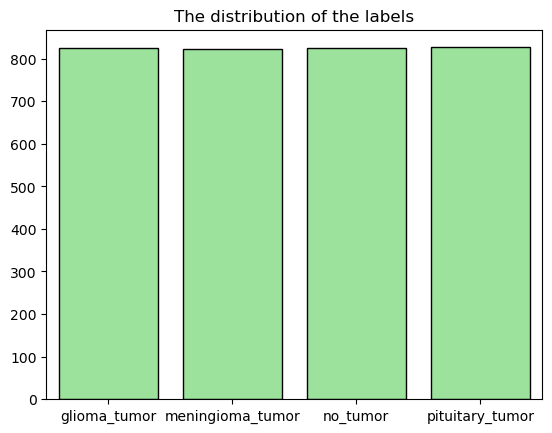

826
822
825
827


In [2]:
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
def counter(path):
    c = 0
    for p in os.scandir(path):
        if p.is_file():
            c += 1
    return c

print(labels)

glioma_path = r'G:\br-t\Training\glioma_tumor'
meningioma_path = r'G:\br-t\Training\meningioma_tumor'
notumor_path = r'G:\br-t\Training\no_tumor'
pituitary_path = r'G:\br-t\Training\pituitary_tumor'

glioma_count = counter(glioma_path)
meningioma_count = counter(meningioma_path)
notumor_count = counter(notumor_path)
pituitary_count = counter(pituitary_path)

sns.barplot(x = labels, y=[glioma_count, meningioma_count, notumor_count, pituitary_count], color='lightgreen', edgecolor='black')
plt.title("The distribution of the labels")
plt.show()

print(glioma_count)
print(meningioma_count)
print(notumor_count)
print(pituitary_count)

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [4]:
train_dir = 'G:/br-t/Training'
test_dir = 'G:/br-t/Testing'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(256, 256),
    batch_size=32,
    shuffle=True,
    label_mode='categorical',  
    validation_split=0.2,      
    subset='training',         
    seed=123                  
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(256, 256),
    batch_size=32,
    shuffle=True,
    label_mode='categorical',  
    validation_split=0.2,      
    subset='validation',       
    seed=123                   
)


num_classes = len(train_ds.class_names) 

Found 3300 files belonging to 4 classes.
Using 2640 files for training.
Found 3300 files belonging to 4 classes.
Using 660 files for validation.


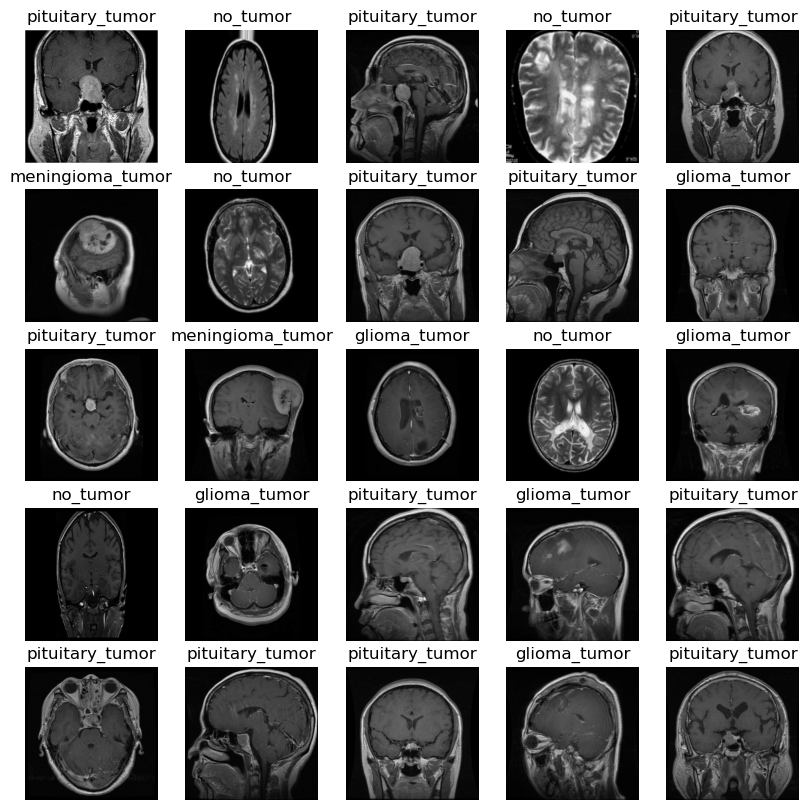

In [5]:
class_names = train_ds.class_names
image_batch, label_batch = next(iter(train_ds))
def plot_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(min(len(images), 25)):  
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(labels[i])])
        plt.axis('off')
    plt.show()
plot_images(image_batch, label_batch, class_names)

In [6]:
from keras.layers import Conv2D, BatchNormalization, Dense, RandomFlip, RandomTranslation, RandomRotation, GlobalAveragePooling2D, Input, RandomZoom, Rescaling, MaxPooling2D, Flatten, Dropout
from keras.preprocessing import image_dataset_from_directory
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [7]:
model = Sequential([
    Input(shape=(256, 256, 3), batch_size=32),
    
    Rescaling(1./255.),
    RandomFlip('horizontal'),
    RandomRotation(0.2),
    RandomZoom(0.2),
    RandomTranslation(height_factor=0.25,width_factor=0.25, fill_mode='reflect', interpolation='bilinear'),
    
    Conv2D(filters=16, kernel_size=(3,3), activation='relu', name='Conv2D_1'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', name='Conv2D_2'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', name='Conv2D_3'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', name='Conv2D_4'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    GlobalAveragePooling2D(),
    Flatten(),
    
    Dense(units=32, activation='relu'),
    BatchNormalization(),
    Dense(units=64, activation='relu'),
    Dropout(0.4),
    Dense(units=128, activation='relu'),
    
    BatchNormalization(),
    Dense(units=256, activation='relu'),
    BatchNormalization(),
    Dense(units=128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(units=num_classes, activation='softmax')
    
])

In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy',
    metrics=['accuracy']
)

In [9]:
ES = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True, mode='max', min_delta=0)
MP = ModelCheckpoint(filepath='Best_model.keras', monitor='val_accuracy', verbose=2, save_best_only=True, mode='max')
RP = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=2, min_lr=0.0001, factor=0.2)
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50, 
    callbacks=[ES, MP, RP]
)
model.save('final_model.keras')

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3745 - loss: 1.7920
Epoch 1: val_accuracy improved from -inf to 0.25152, saving model to Best_model.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.3752 - loss: 1.7897 - val_accuracy: 0.2515 - val_loss: 1.4669 - learning_rate: 0.0010
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4814 - loss: 1.4084
Epoch 2: val_accuracy improved from 0.25152 to 0.37879, saving model to Best_model.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.4815 - loss: 1.4076 - val_accuracy: 0.3788 - val_loss: 1.4725 - learning_rate: 0.0010
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5444 - loss: 1.1652
Epoch 3: val_accuracy did not improve from 0.37879
83/83 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.5445 - loss: 1.1648 - val_accuracy: 0.3455 - val_loss: 1.4634 - learning_rate: 0.0010
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6183 - loss: 0.9929
Epoch 4: val_accuracy 

Epoch 24/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7994 - loss: 0.5021
Epoch 24: val_accuracy improved from 0.76515 to 0.79091, saving model to Best_model.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.7994 - loss: 0.5021 - val_accuracy: 0.7909 - val_loss: 0.4870 - learning_rate: 2.0000e-04
Epoch 25/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7932 - loss: 0.5090
Epoch 25: val_accuracy did not improve from 0.79091
83/83 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.7934 - loss: 0.5088 - val_accuracy: 0.7803 - val_loss: 0.4961 - learning_rate: 2.0000e-04
Epoch 26/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8087 - loss: 0.4840
Epoch 26: val_accuracy did not improve from 0.79091
83/83 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.8087 - loss: 0.4839 - val_accuracy: 0.7742 - val_loss: 0.5576 - learning_rate: 2.0000e-04
Epoch 27/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8161 - loss: 0.4969
Epoch 27: val_accuracy improved from 0

Epoch 47/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8524 - loss: 0.4104
Epoch 47: val_accuracy did not improve from 0.86212
83/83 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.8524 - loss: 0.4103 - val_accuracy: 0.7606 - val_loss: 0.5727 - learning_rate: 1.0000e-04
Epoch 48/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8450 - loss: 0.3992
Epoch 48: val_accuracy did not improve from 0.86212
83/83 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.8450 - loss: 0.3991 - val_accuracy: 0.7985 - val_loss: 0.5039 - learning_rate: 1.0000e-04
Epoch 48: early stopping
Restoring model weights from the end of the best epoch: 38.


In [10]:
test_dir = 'G:/br-t/Testing'

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(256, 256),
    batch_size=32,
    shuffle=False,           
    label_mode='categorical'  
)

Found 394 files belonging to 4 classes.


In [11]:
import numpy as np

# Get predictions from the model
predictions = model.predict(test_ds)
# Initialize empty lists to store true labels and predictions
true_labels = []
predicted_labels = []

# Iterate through the test dataset
for images, labels in test_ds:
    # Append true labels
    true_labels.append(labels.numpy())
    # Append predictions
    predicted_labels.append(model.predict(images))

# Convert lists to numpy arrays
true_labels = np.concatenate(true_labels)
predicted_labels = np.concatenate(predicted_labels)
# Convert predicted probabilities to class indices
predicted_class_indices = np.argmax(predicted_labels, axis=1)
true_class_indices = np.argmax(true_labels, axis=1)
# Compare predictions with true labels
correct_predictions = np.sum(predicted_class_indices == true_class_indices)
total_predictions = len(true_class_indices)
incorrect_predictions = total_predictions - correct_predictions

print(f"Number of correct predictions: {correct_predictions}")
print(f"Number of incorrect predictions: {incorrect_predictions}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
Number of correct predictions: 234
Number of incorrect predictions: 160


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


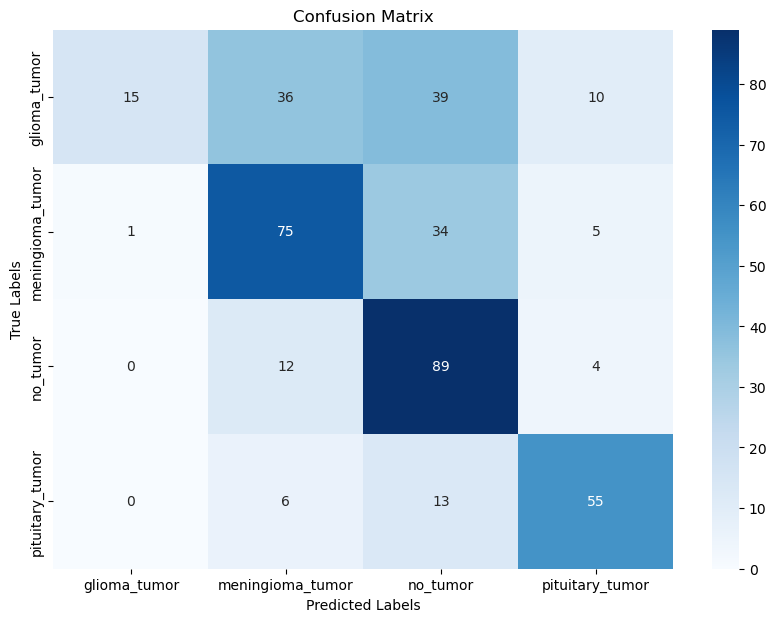

                  precision    recall  f1-score   support

    glioma_tumor       0.94      0.15      0.26       100
meningioma_tumor       0.58      0.65      0.61       115
        no_tumor       0.51      0.85      0.64       105
 pituitary_tumor       0.74      0.74      0.74        74

        accuracy                           0.59       394
       macro avg       0.69      0.60      0.56       394
    weighted avg       0.68      0.59      0.55       394



In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions from the model
predictions = model.predict(test_ds)
# Initialize empty lists to store true labels and predictions
true_labels = []
predicted_labels = []

# Iterate through the test dataset
for images, labels in test_ds:
    # Append true labels
    true_labels.append(labels.numpy())
    # Append predictions
    predicted_labels.append(model.predict(images))

# Convert lists to numpy arrays
true_labels = np.concatenate(true_labels)
predicted_labels = np.concatenate(predicted_labels)

# Convert predicted probabilities to class indices
predicted_class_indices = np.argmax(predicted_labels, axis=1)
true_class_indices = np.argmax(true_labels, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(true_class_indices, predicted_class_indices)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=test_ds.class_names, 
            yticklabels=test_ds.class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Optionally: Print classification report for additional metrics
print(classification_report(true_class_indices, predicted_class_indices, target_names=test_ds.class_names))
